In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [11]:
data = pd.read_excel("almostdone.xlsx",)


In [12]:
data.index

RangeIndex(start=0, stop=1983, step=1)

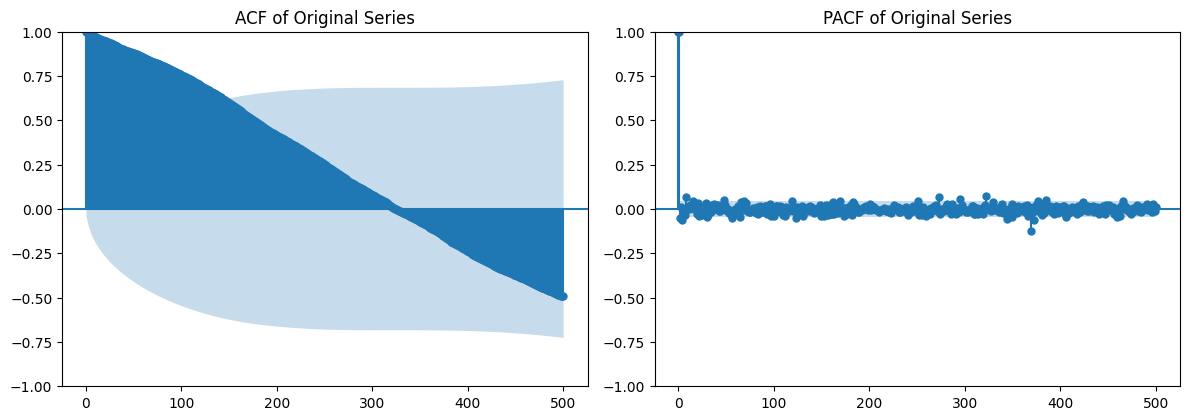

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sm.graphics.tsa.plot_acf(data['Close'], lags=500, ax=plt.gca())
plt.title("ACF of Original Series")

plt.subplot(2, 2, 2)
sm.graphics.tsa.plot_pacf(data['Close'], lags=500, ax=plt.gca())
plt.title("PACF of Original Series")

plt.tight_layout()
plt.show()


In [20]:
def difference_series(series, d):
    if d == 0:
        return series
    return difference_series(series.diff().dropna(), d - 1)

# Create differenced series with d = 1, 2, 3, and 4
differenced_series_1 = difference_series(data['Close'], 1)
differenced_series_2 = difference_series(data['Close'], 2)
differenced_series_3 = difference_series(data['Close'], 3)
differenced_series_4 = difference_series(data['Close'], 4)


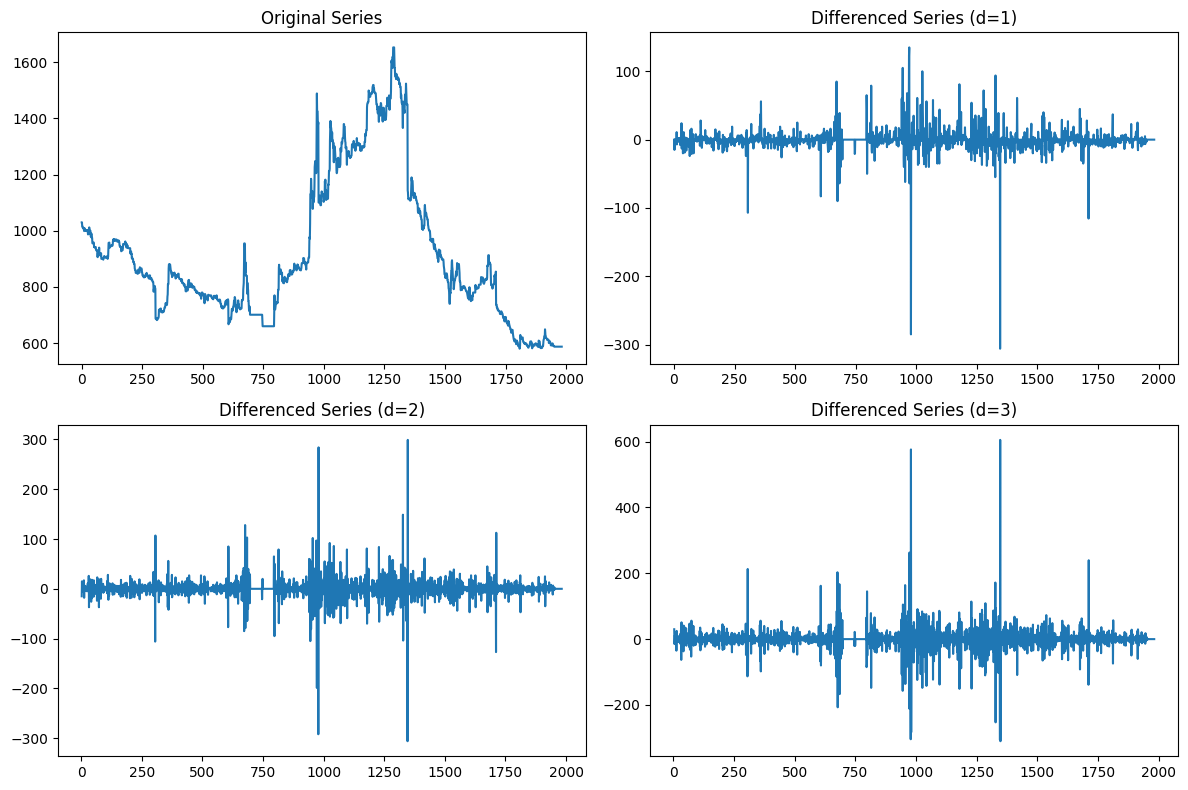

In [22]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(data['Close'])
plt.title("Original Series")

plt.subplot(2, 2, 2)
plt.plot(differenced_series_1)
plt.title("Differenced Series (d=1)")

plt.subplot(2, 2, 3)
plt.plot(differenced_series_2)
plt.title("Differenced Series (d=2)")

plt.subplot(2, 2, 4)
plt.plot(differenced_series_3)
plt.title("Differenced Series (d=3)")

plt.tight_layout()
plt.show()


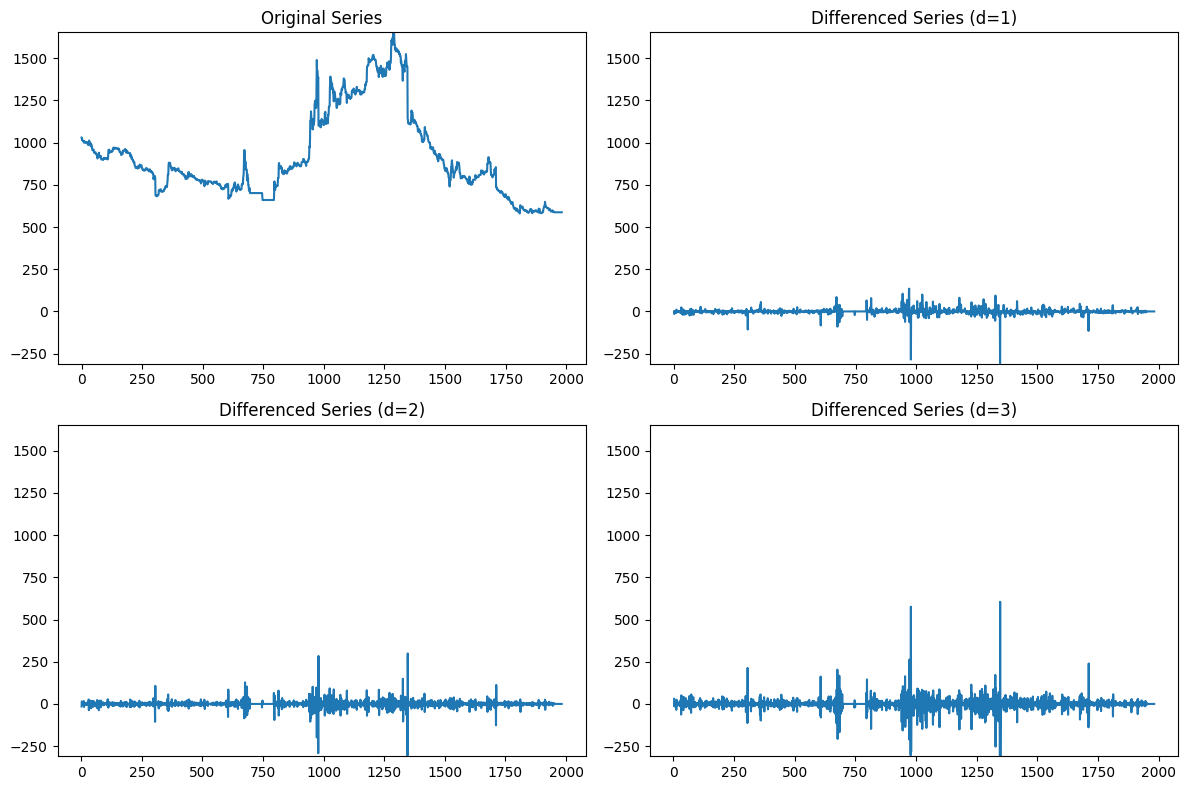

In [25]:
plt.figure(figsize=(12, 8))

# Calculate the maximum and minimum values across all series for consistent y-axis scaling
min_value = min(data['Close'].min(), differenced_series_1.min(), differenced_series_2.min(), differenced_series_3.min())
max_value = max(data['Close'].max(), differenced_series_1.max(), differenced_series_2.max(), differenced_series_3.max())

plt.subplot(2, 2, 1)
plt.plot(data['Close'])
plt.title("Original Series")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 2)
plt.plot(differenced_series_1)
plt.title("Differenced Series (d=1)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 3)
plt.plot(differenced_series_2)
plt.title("Differenced Series (d=2)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 4)
plt.plot(differenced_series_3)
plt.title("Differenced Series (d=3)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.tight_layout()
plt.show()


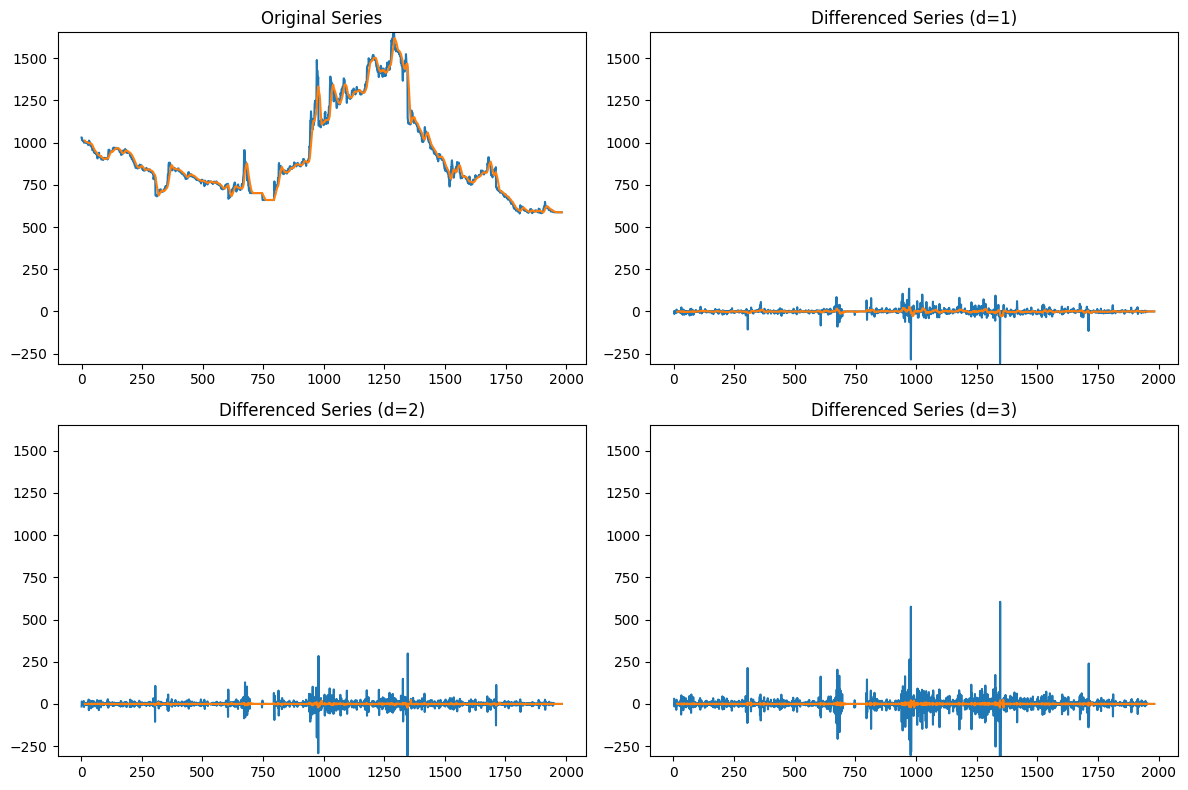

In [26]:
plt.figure(figsize=(12, 8))

# Calculate the maximum and minimum values across all series for consistent y-axis scaling
min_value = min(data['Close'].min(), differenced_series_1.min(), differenced_series_2.min(), differenced_series_3.min())
max_value = max(data['Close'].max(), differenced_series_1.max(), differenced_series_2.max(), differenced_series_3.max())

window_size = 14

plt.subplot(2, 2, 1)
plt.plot(data['Close'])
rolling_mean = data['Close'].rolling(window=window_size).mean()
plt.plot(rolling_mean, label='Moving Average (window=14)')
plt.title("Original Series")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 2)
plt.plot(differenced_series_1)
rolling_mean_1 = differenced_series_1.rolling(window=window_size).mean()
plt.plot(rolling_mean_1, label='Moving Average (window=14)')
plt.title("Differenced Series (d=1)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 3)
plt.plot(differenced_series_2)
rolling_mean_2 = differenced_series_2.rolling(window=window_size).mean()
plt.plot(rolling_mean_2, label='Moving Average (window=14)')
plt.title("Differenced Series (d=2)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.subplot(2, 2, 4)
plt.plot(differenced_series_3)
rolling_mean_3 = differenced_series_3.rolling(window=window_size).mean()
plt.plot(rolling_mean_3, label='Moving Average (window=14)')
plt.title("Differenced Series (d=3)")
plt.ylim(min_value, max_value)  # Set common y-axis limit

plt.tight_layout()
plt.show()


In [23]:
print("Mean of Differenced Series (d=1):", np.mean(differenced_series_1))
print("Mean of Differenced Series (d=2):", np.mean(differenced_series_2))
print("Mean of Differenced Series (d=3):", np.mean(differenced_series_3))
print("Mean of Differenced Series (d=4):", np.mean(differenced_series_4))


Mean of Differenced Series (d=1): -0.22336024217961656
Mean of Differenced Series (d=2): 0.0
Mean of Differenced Series (d=3): 0.007575757575757576
Mean of Differenced Series (d=4): -0.015159171298635674


In [24]:
print("S.D. of Differenced Series (d=1):", np.std(differenced_series_1))
print("S.D. of Differenced Series (d=2):", np.std(differenced_series_2))
print("S.D. of Differenced Series (d=3):", np.std(differenced_series_3))
print("S.D. of Differenced Series (d=4):", np.std(differenced_series_4))


S.D. of Differenced Series (d=1): 16.513315246621506
S.D. of Differenced Series (d=2): 22.68126913804134
S.D. of Differenced Series (d=3): 38.80495520766006
S.D. of Differenced Series (d=4): 70.0702453621082


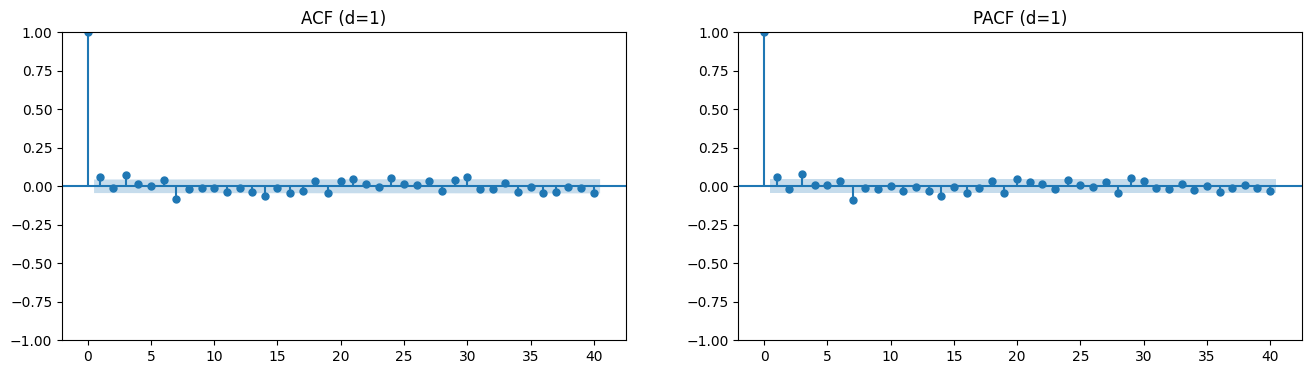

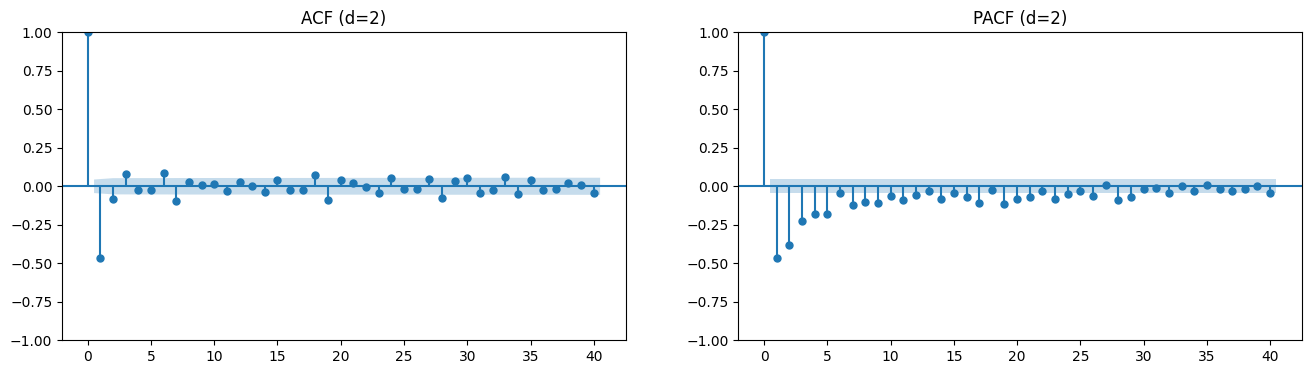

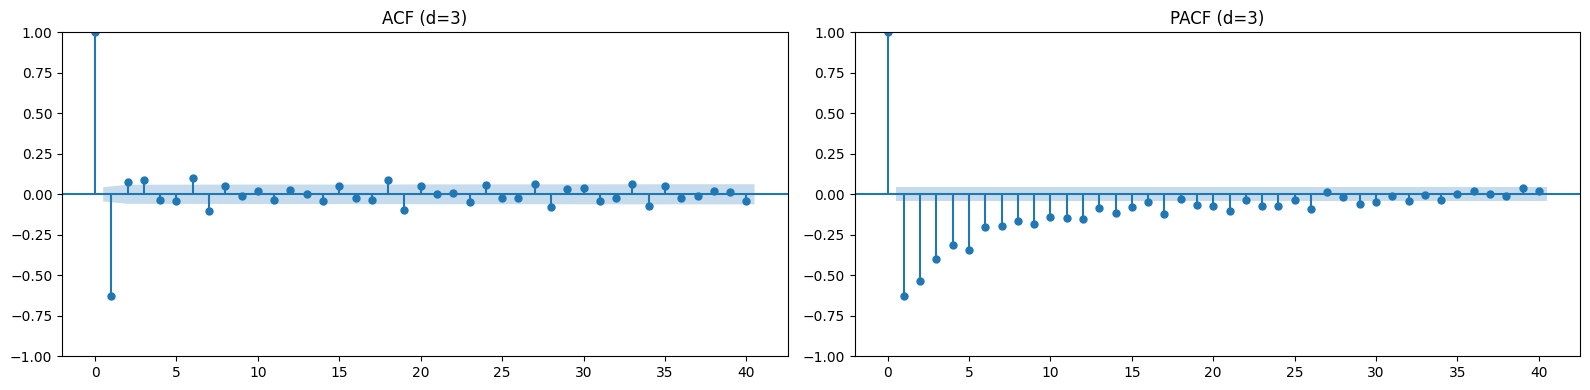

In [30]:
##(p,q,d) estimations

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sm.graphics.tsa.plot_acf(differenced_series_1, lags=40, ax=plt.gca())
plt.title("ACF (d=1)")

plt.subplot(1, 2, 2)
sm.graphics.tsa.plot_pacf(differenced_series_1, lags=40, ax=plt.gca())
plt.title("PACF (d=1)")



plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sm.graphics.tsa.plot_acf(differenced_series_2, lags=40, ax=plt.gca())
plt.title("ACF (d=2)")

plt.subplot(1, 2, 2)
sm.graphics.tsa.plot_pacf(differenced_series_2, lags=40, ax=plt.gca())
plt.title("PACF (d=2)")

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sm.graphics.tsa.plot_acf(differenced_series_3, lags=40, ax=plt.gca())
plt.title("ACF (d=3)")

plt.subplot(1, 2, 2)
sm.graphics.tsa.plot_pacf(differenced_series_3, lags=40, ax=plt.gca())
plt.title("PACF (d=3)")

plt.tight_layout()
plt.show()